In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# env = gym.make('FrozenLake-v1', render_mode='human')
env = gym.make('FrozenLake-v1', render_mode='ansi')
s, _ = env.reset()
s

0

In [3]:
print(env.render())


SFFF
FHFH
FFFH
HFFG



In [4]:
env.observation_space

Discrete(16)

In [5]:
env.observation_space.n

16

In [6]:
env.action_space

Discrete(4)

In [7]:
env.action_space.n

4

In [8]:
# action
# 0: Left
# 1: Down
# 2: Right
# 3: Up

In [9]:
# P[s][a]
env.P[0][2]
# result: probability, next state, reward, terminal state

[(0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False)]

In [10]:
# P[s][a]
env.P[9][2]
# result: probability, next state, reward, terminal state

[(0.3333333333333333, 13, 0.0, False),
 (0.3333333333333333, 10, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]

In [11]:
# P[s][a]
env.P[14][2]
# result: probability, next state, reward, terminal state

[(0.3333333333333333, 14, 0.0, False),
 (0.3333333333333333, 15, 1.0, True),
 (0.3333333333333333, 10, 0.0, False)]

In [12]:
a = 2
next_s, reward, terminated, truncated, info = env.step(a)
next_s, reward, terminated, truncated, info

(1, 0.0, False, False, {'prob': 0.3333333333333333})

In [13]:
a = env.action_space.sample() # random (uniform) policy
a

3

In [14]:
next_s, reward, terminated, truncated, info = env.step(a)
next_s, reward, terminated, truncated, info

(0, 0.0, False, False, {'prob': 0.3333333333333333})

In [15]:
env.close()

In [16]:
# simulation of one episode (text mode)
env = gym.make('FrozenLake-v1', render_mode='ansi')
s, _ = env.reset()
print(env.render())

while True:
    a = env.action_space.sample() # random (uniform) policy
    s, r, terminated, _, _ = env.step(a)
    print(env.render())
    if terminated:
        break

env.close()


SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG



In [19]:
# simulation of one episode (graphic mode)
env = gym.make('FrozenLake-v1', render_mode='human')
s, _ = env.reset()
env.render()
while True:
    a = env.action_space.sample() # random (uniform) policy
    s, r, terminated, _, _ = env.step(a)
    time.sleep(0.5)
    env.render()
    if terminated:
        break
env.close()

: 

In [18]:
# simulation of one episode (without rendering)
env = gym.make('FrozenLake-v1')
s, _ = env.reset()
episode_states = [s]
episode_rewards = []
episode_actions = []

while True:
    a = env.action_space.sample() # random (uniform) policy
    s, r, terminated, _, _ = env.step(a)

    episode_states.append(s)
    episode_rewards.append(r)
    episode_actions.append(a)

    if terminated:
        break

env.close()

print('states:', episode_states)
print('actions:', episode_actions)
print('rewards:', episode_rewards)

states: [0, 1, 0, 0, 1, 2, 1, 0, 4, 8, 12]
actions: [3, 1, 2, 3, 2, 3, 3, 0, 2, 2]
rewards: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [20]:
def get_return(rewards, gamma):
    G = 0.0
    for t, r in enumerate(rewards):
        G += (gamma ** t) * r

    return G

In [21]:
gamma = 0.9
get_return(episode_rewards, gamma)

0.0

In [29]:
# simulation of multiple episodes
env = gym.make('FrozenLake-v1')
gamma = 0.9
N_EPISODES = 1000
list_G = []

for i in range(N_EPISODES):
    s, _ = env.reset()
    G = 0.0
    t = 0
    while True:
        a = env.action_space.sample() # random (uniform) policy
        s, r, terminated, _, _ = env.step(a)
        G += (gamma ** t) * r
        t += 1

        if terminated:
            list_G.append(G)
            break
env.close()

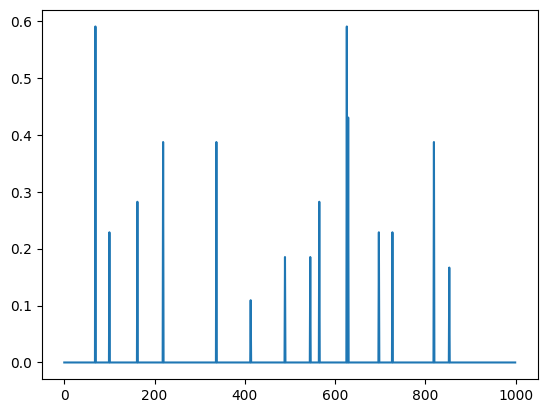

Mean return (value) of state 0 = 0.00467


In [23]:
plt.figure()
plt.plot(list_G)
plt.show()

print(f'Mean return (value) of state 0 = {np.mean(list_G):.5f}')

In [24]:
# a custom policy
def get_action(s):
    # move down if agent is beside the right wall (states 3, 7, and 11),
    # else move right
    a = 1 if s in [3, 7, 11] else 2
    return a

In [25]:
get_action(0)

2

In [26]:
get_action(3)

1

In [27]:
# simulation of multiple episodes
# with the custom policy defined above
env = gym.make('FrozenLake-v1')
gamma = 0.9
N_EPISODES = 1000
list_G = []

for i in range(N_EPISODES):
    s, _ = env.reset()
    G = 0.0
    t = 0
    while True:
        a = get_action(s) # the custom policy
        s, r, terminated, _, _ = env.step(a)
        G += (gamma ** t) * r
        t += 1

        if terminated:
            list_G.append(G)
            break

env.close()

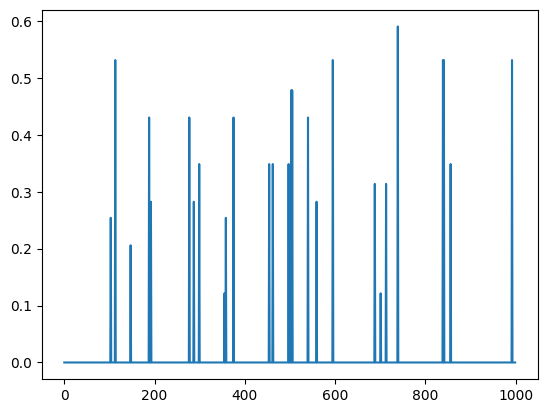

Mean return (value) of state 0 = 0.01010


In [28]:
plt.figure()
plt.plot(list_G)
plt.show()

print(f'Mean return (value) of state 0 = {np.mean(list_G):.5f}')